<h1 align= "center"><b>HS4007: Mini Assignment 1 <b><h1>
<hr>
<h2 align ="center"> Credit Model<h2> 
<h3 align = "center">-B Aditi, MM19b022<h3>




**Problem Statement:** *This problem deals with a credit model involving the farmer loan system. Following the discussion in class, the problem of Lenders inducing bad loans is modelled and studied in this assignment. Note that in this problem, the profit obtained from collateral (C - L) is assumed to be greater than the profit obtained by loan interest rate $((r + k \times L) \times L)$*

In order to understand the problem better, the first step would be to observe the lenders' and the borrowers' payoff trends with respect to the percentage of defaulters

**Model 1:** Let all collaterals be good collaterals (i.e., $C>L$). Based on this we can deduce the following:
*   Lender's payoff: 
> Profit from good borrower = $(r + k \times L) \times L$ \
> Profit from defaulters = $C-L$ \
> Expected payoff = $(1-d) \times [(r +k \times L) \times L] + (d) \times [C - L]$
*   Borrowers payoff: 
> Profit by good borrower = $(S + L) \times \beta - (1 + r + k \times L) \times L$ \
> Profit made by defaulter = $C - L$ ,which is negative \
> Expected payoff = $(1-d) \times [S + L) \times \beta - (1 + r + k \times L) \times L] + (d) \times [L - C]$ 
*  Optimum loan size:
> On optimizing the above equation, we get the loan amount as: \
> $L_{max} = \frac{\beta -1-r+ \frac{d}{1-d}}{2 \times k}$  



In [1]:
import numpy as np 
import math as mt
import matplotlib.pyplot as plt
from random import randrange 


In [2]:
def plot_2(y1, y2, xl, t1, t2):
  fig,ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(y1, linestyle = 'solid', color='r')
  ax2.plot(y2, linestyle = 'solid', color='b')
  ax1.set_xlabel(xl)
  ax1.set_ylabel(t1, color='r')
  ax2.set_ylabel(t2, color='b')
  ax1.legend(t1, loc = "upper right")
  ax2.legend(t2, loc = "upper left")
  plt.show()

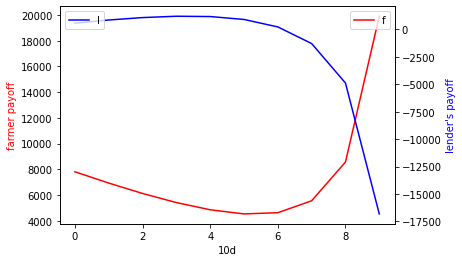

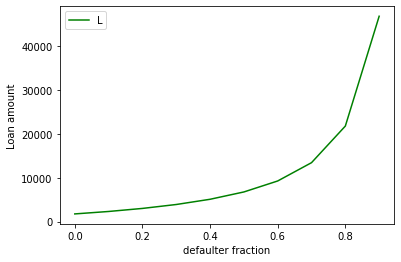

Maximum payoff for lender=  1202
corresponding loan amount=  3893
corresponding farmer's payoff=  5411


In [4]:
#model 1
#Declaration of parameters
S = 5000
r = 0.15
k = 0.0001
C = 3000
d = [i/10 for i in range(10)]
beta = 1.5

y1 = []
y2 = []
L_arr = []

for d_loop in d:
  L = round((beta - 1 - r + (d_loop)/(1-d_loop))/(2*k))
  y1.append((1-d_loop)*((S+L)*beta - (1 + r + k*L)*L) + (d_loop)*(L-C))
  y2.append(round((1-d_loop)*(r+k*L)*L + (d_loop)*(C-L)))  
  L_arr.append(L)

plot_2(y1,y2,"10d","farmer payoff","lender's payoff")
plt.plot(d,L_arr, color = 'g')
plt.xlabel('defaulter fraction')
plt.ylabel('Loan amount')
plt.legend("Loan")
plt.show()

print("Maximum payoff for lender= ", max(y2))
d_max = y2.index(max(y2))/10
print("corresponding loan amount= ", round((beta - 1 - r + (d_max)/(1-d_max))/(2*k)))
print("corresponding farmer's payoff= ",round(y1[y2.index(max(y2))]))



From the given plots we can deduce the following trends: 

* The lenders' payoff first increases and then decreases
* The borrowers' payoff first decreases and then increases
*loan amount is contantly increasing

Furthermore, we observe that the loan amount corresponding to the maximum lender payoff is greater than the value of the collateral. This can be explained as the increase in the interest rate compensates for the loss in due to collateral being lesser. 

From this, we can say that the 


**Model 2:** Lenders induce defaulters by giving excess/bad loans. \
Let $x$ be the fraction of bad loans given out by the lenders, called $L_{bad}$. Let d continue to be the fraction of defaulters. Now, the payoffs maybe calculated as: 

* Lenders' payoff = $(1-x) \times ((1-d) \times [(r +k \times L) \times L] + (d) \times [C - L]) + x \times (C - L_{bad})$
* Borrowers' payoff = $(1-x) \times ((1-d) \times [S + L) \times \beta - (1 + r + k \times L) \times L] + (d) \times [L - C]) + x \times (L_{bad} - C)$

Thus, the borrower will be willing to borrow loan only if
$$(1-x) \times ((1-d) \times [S + L) \times \beta - (1 + r + k \times L) \times L] + (d) \times [L - C]) > x \times (C - L_{bad})$$
$$=> \frac{x}{1-x} < \frac{(1-d) \times [S + L) \times \beta - (1 + r + k \times L) \times L] + (d) \times [L - C]}{C - L_{bad}}$$
That is, if the ratio of bad to good lenders in less than payoff for good to bad loans. 

Consider the case where $x = 0.2$ and $L_{bad} = 2000$. 

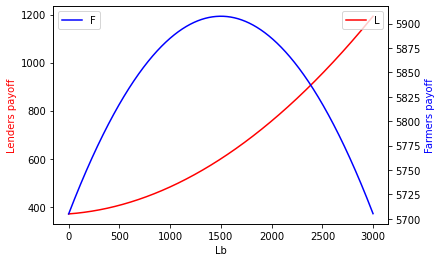

The maximum loan a regular farmer would prefer to borrow is 1500
Farmers' expected payoff was found to be 5907.5
Lender's expected payofff was found to be 599.5


In [19]:
#model 2
S = 5000
r = 0.15
k = 0.0001
C = 3000
beta = 1.5
x = 0.1
d = 0.1
y1 = []
y2 = []

for L in range(3000):
  Lb = 2000
  y1.append((1-x)*((1-d)*(r + k*L)*L + d*(C - L)) + x*(C-Lb))
  y2.append((1-x)*((1-d)*(S + L)*beta -(1+r+k*L)*L + d*(L - C)) + x*(Lb-C))

plot_2(y1,y2,'Lb','Lenders payoff', 'Farmers payoff')
ind = y2.index(max(y2))
print("The maximum loan a regular farmer would prefer to borrow is", ind)
print("Farmers' expected payoff was found to be", max(y2))
print("Lender's expected payofff was found to be", y1[ind])


From above graph it maybe interpretted that a farmer will borrow a maximum loan of 1500 to maximise his profits

**Conclutions:** From these models we can infere the following: 

* The presence of loan defaulters will only increase the payoff for the lender upto a point
* When bad lenders choose to increase the loan amount in order to induce defaulting, the value of collateral bounds the maximum loan amount.  